<a href="https://colab.research.google.com/github/anjalish05/computer-vision/blob/main/CV_A3_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision
## Assignment-3
#### Anjali Singh, 2020102004


### Q2: YOLO Object Detecttion

#### part-1
Download the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown --id 12YGepwZVl-S9vqV269PJZy76W216Ipjc

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=12YGepwZVl-S9vqV269PJZy76W216Ipjc
From (redirected): https://drive.google.com/uc?id=12YGepwZVl-S9vqV269PJZy76W216Ipjc&confirm=t&uuid=a56cd1ac-a9e7-4693-a602-a02dfb9d085c
To: /content/archive.zip
100% 515M/515M [00:02<00:00, 207MB/s]


In [ ]:
!mkdir archive

mkdir: cannot create directory ‘archive’: File exists


In [6]:
import os
import zipfile

# List the contents of the current directory
print(os.listdir())

# Navigate to the inner folder
zip_file_path = '/content/archive.zip'

extract_to_directory = '/content/archive'

# Create the directory if it doesn't exist
os.makedirs(extract_to_directory, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

# List the contents of the extracted directory
print("Contents of the extracted directory:")
print(os.listdir(extract_to_directory))


['.config', 'archive', 'archive.zip', 'sample_data']
Contents of the extracted directory:
['config.yaml', 'labels', 'images']


#### part-2
<b> Understanding YOLO detector. </b>
- YOLO is a single-shot object detection model that predicts bounding boxes and class probabilities directly from a single pass of the neural network, whereas, R-CNN uses a 3-stage approach. They first propose RoIs using selective search, then extract featuers from these RoIs and classify them using a classifier.
- YOLO is better with its speed and efficiency, whereas R-CNN os better with accuracy.
- YOLO optimizes detection performance directly. It uses a single loss function that combines localization error and classification error. R-CNN uses separate stages for region proposal and object detection, making the training process more complex. <br><br>
<b>There are more than 8 versions of the YOLO series. Pick any 3 and
understand and explain (in your words) the differences between them</b> <br>
All versions of the YOLO series share the core principle of single-shot object detection, each version introduces unique architectural improvements, training strategies, and optimization techniques aimed at enhancing speed, accuracy, and robustness in object detection tasks.
- YOLO-v3: enhanced anchor box clustering strategy for better handling of object aspect ratios and sizes.
- YOLO-v4: Introduced training strategies like mosaic data augmentation and novel activation functions (e.g., Mish).
- YOLO-v5: Introduced training enhancements such as automatic hyperparameter optimization and mixed precision training.

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

In [8]:
torch.cuda.is_available()

True

In [10]:
!pip install ultralytics

#### part-3


##### (i)
Yolo-v8n-nano model from scratch.

In [11]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.9/78.2 GB disk)


In [12]:
from ultralytics import YOLO

In [13]:
model = YOLO('yolov8n.yaml')

In [14]:
dataset_path = "/content/archive/config.yaml"

In [ ]:
results = model.train(data=dataset_path, epochs=10, batch=8, save_period=1, plots=True, exist_ok=True)

Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/archive/config.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 106MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 294MB/s]


AMP: checks passed ✅


train: Scanning /content/archive/labels/train... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:03<00:00, 128.77it/s]


train: New cache created: /content/archive/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/archive/labels/val... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:01<00:00, 41.86it/s]

val: New cache created: /content/archive/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      1.35G      3.176      5.111      4.332          8        640: 100%|██████████| 50/50 [00:17<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

                   all         50         52    0.00234      0.635    0.00525    0.00161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      1.27G      3.044      4.637      4.037         11        640: 100%|██████████| 50/50 [00:13<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]

                   all         50         52    0.00472      0.423    0.00853    0.00275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      1.26G      2.928      4.371      3.785          8        640: 100%|██████████| 50/50 [00:13<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

                   all         50         52    0.00253      0.654     0.0179    0.00581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      1.27G      2.926        4.2       3.61          8        640: 100%|██████████| 50/50 [00:13<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]


                   all         50         52     0.0608      0.115     0.0312    0.00755

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      1.27G      2.791      3.985      3.431          8        640: 100%|██████████| 50/50 [00:13<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.41it/s]


                   all         50         52    0.00303      0.846     0.0205     0.0049

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      1.27G      2.738      3.909      3.381          8        640: 100%|██████████| 50/50 [00:13<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.96it/s]

                   all         50         52    0.00329      0.788     0.0325    0.00875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.27G        2.7      3.862      3.306          9        640: 100%|██████████| 50/50 [00:13<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]

                   all         50         52    0.00317      0.865     0.0382     0.0106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      1.27G      2.648       3.73      3.256          9        640: 100%|██████████| 50/50 [00:13<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]

                   all         50         52    0.00331      0.923      0.112     0.0303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      1.27G      2.622      3.701      3.224          7        640: 100%|██████████| 50/50 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

                   all         50         52    0.00359      0.904     0.0826     0.0267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.26G      2.582       3.61      3.176          8        640: 100%|██████████| 50/50 [00:13<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.79it/s]

                   all         50         52    0.00401      0.846     0.0837     0.0255



10 epochs completed in 0.045 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]


                   all         50         52    0.00331      0.923      0.113     0.0303
Speed: 0.3ms preprocess, 6.9ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to runs/detect/train


<b>How many parameters does this model have?</b> <br>
There are 3011043 number of parameters. <br>
<b> How many convolutional layers does it use? </b> <br>
In Yolo-v8, backbone has 53 convolution layers and total 225 layers for Yolo-v8-n model. <br>
YOLOv8n summary: 225 layers, 3011043 parameters, 3011027 gradients, 8.2 GFLOPs

##### (ii)
<b>  Compare the size (# parameters and # conv layers) of this model against yolov8m (medium) model. </b> <br>

For <b>Yolo-v8m</b>:- <br>
Number of convolutional layers: 295 layers, 25856899 parameters, 25856883 gradients, 79.1 GFLOPs. <br>
And for <b> Yolo-v8n</b>:- <br>
Number of convolutional layers: 225 layers, 3011043 parameters, 3011027 gradients, 8.2 GFLOPs

#### part-4

##### (i)
Create two versions of the training dataset. train1 = 100 images. train2 = 400 images.

In [15]:
import shutil
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [21]:
!mkdir /content/archive1

mkdir: cannot create directory ‘/content/archive1’: File exists


In [26]:
!mkdir /content/archive1/images/train

In [27]:
!mkdir /content/archive1/images/val

In [29]:
!mkdir /content/archive1/labels/train

In [30]:
!mkdir /content/archive1/labels/val

In [33]:
train_imgs = "/content/archive/images/train"
label_imgs = "/content/archive/labels/train"
val_imgs = "/content/archive/images/val"
val_label = "/content/archive/labels/val"
config_path = "/content/archive/config.yaml"

train1_imgs = "/content/archive1/images/train"
label1_imgs = "/content/archive1/labels/train"
val1_imgs = "/content/archive1/images/val"
val1_label = "/content/archive1/labels/val"
config1_path = "/content/archive1"

os.makedirs(train1_imgs, exist_ok=True)
os.makedirs(label1_imgs, exist_ok=True)
os.makedirs(val1_imgs, exist_ok=True)
os.makedirs(config1_path, exist_ok=True)

# selecting 100 images
selected_imgs = os.listdir(train_imgs)[:100]
selected_labels = os.listdir(label_imgs)[:100]
selected_config = os.listdir(config_path)

print(selected_imgs)
for image in selected_imgs:
    image_path = os.path.join(train_imgs, image)
    shutil.copy(image_path, train1_imgs)

for label in selected_labels:
    # print(label_path)
    label_path = os.path.join(label_imgs, label)
    shutil.copy(label_path, label1_imgs)

for validation in os.listdir(val_label):
    val_label_path = os.path.join(val_label, validation)
    shutil.copy(val_label_path, val1_label)

for validation in os.listdir(val_imgs):
    val_path = os.path.join(val_imgs, validation)
    shutil.copy(val_path, val1_imgs)

# Copy config.yaml to train1 directory
shutil.copy('/content/archive1/config.yaml', train1_imgs)

['97d43bce58c66612.png', '8d38702bbf52a82f.png', 'ab1b5b22882f9c86.png', 'b70751d16205a42c.png', '98ee1c1ec7fb90f2.png', 'a271d0a903282a30.png', '8ef136c761f2b06c.png', 'ace3d29804a8a762.png', '911ba86e9dc4d76f.png', '96d92e2755db6f65.png', 'abe645a42edf2465.png', '8857d2dac508ad69.png', 'add2147dae728327.png', 'ad2f3df9acc39840.png', 'af48a67357f9caca.png', 'a939e2873fa6bce1.png', 'b84251dd21c5ab81.png', '8d806915eeb92668.png', 'a34d073acc64622d.png', 'b5ea3bba0a565772.png', 'a00d1aadf2723055.png', '81d9d09e00625fa9.png', '90954c319de9d3c0.png', 'b521bc03f3dede65.png', '9f1698b31d2c24c9.png', 'b1a8514060516c01.png', 'abe04919bc29990b.png', 'af842b0afb786b18.png', '8cc7d6a5e087914b.png', '82b7c0be8bb7a7fc.png', '8a0645cc12db095e.png', '9ab7158ebe1a34c7.png', 'b36fc4023729fa94.png', '7f379fa77db85ea7.png', '8cc8ab94634278cf.png', '8a3c2819df139e79.png', '8ab43fee326d5393.png', 'b7f8985552e25632.png', '9688d1fe77b3b871.png', '9538dbc85f468b5c.png', '9510baa524eb32c4.png', '7f772eeb52c1d0

'/content/archive1/images/train/config.yaml'

##### (ii)
 On both training dataset variants above, train three variants of the Yolo v8 models: (a) yolov8n initialized
from scratch; (b) yolov8n from pretrained weights; and (c) yolov8m from pretrained weights.


In [34]:
dataset_path_1 = "/content/archive1/config.yaml"

In [ ]:
# dataset_path_2 = "/content/archive/config2.yaml"

<b> (a) Yolo-v8n initialized from scratch </b>

In [35]:
model = YOLO('yolov8n.yaml')

In [ ]:
results1 = model.train(data=dataset_path_1, epochs=5, batch=8, save_period=1, plots=True, exist_ok=True)



Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/archive1/config.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

train: Scanning /content/archive1/labels/train.cache... 20 images, 80 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/archive1/labels/val... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 84.08it/s]


val: New cache created: /content/archive1/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      1.31G      3.481      21.67      3.609          2        640: 100%|██████████| 13/13 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]

                   all         50         52     0.0024      0.635     0.0055    0.00202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      1.31G      3.612      8.378      4.343          2        640: 100%|██████████| 13/13 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.15it/s]

                   all         50         52    0.00239      0.635    0.00699    0.00193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      1.31G      3.092      8.599      3.918          1        640: 100%|██████████| 13/13 [00:02<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]

                   all         50         52     0.0023      0.615    0.00478    0.00192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      1.32G      3.216      11.87      3.902          2        640: 100%|██████████| 13/13 [00:02<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.25it/s]

                   all         50         52    0.00227      0.615    0.00633    0.00321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      1.32G       3.52      14.28      3.886          1        640: 100%|██████████| 13/13 [00:03<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all         50         52    0.00227      0.615    0.00554    0.00216



5 epochs completed in 0.011 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.59it/s]


                   all         50         52    0.00227      0.615     0.0117    0.00747
Speed: 1.0ms preprocess, 8.6ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/train


In [ ]:
# results2 = model.train(data=dataset_path_2, epochs=10, batch=8)

New https://pypi.org/project/ultralytics/8.1.46 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/archive/config2.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train182, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, 

train: Scanning /content/archive/labels/train2... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:01<00:00, 250.47it/s]

train: New cache created: /content/archive/labels/train2.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/archive/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train182/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train182
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.02G      3.168      5.113      4.333          8        640: 100%|██████████| 50/50 [00:16<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]

                   all         50         52    0.00242      0.654    0.00487    0.00157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      1.89G      3.105      4.607      4.033         11        640: 100%|██████████| 50/50 [00:14<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.30it/s]

                   all         50         52    0.00512      0.462    0.00726    0.00242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      1.89G      2.891      4.342      3.784          8        640: 100%|██████████| 50/50 [00:13<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all         50         52      0.005      0.519     0.0251    0.00486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      1.89G      2.888      4.221      3.612          8        640: 100%|██████████| 50/50 [00:13<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.34it/s]

                   all         50         52    0.00623     0.0385    0.00923    0.00275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      1.89G      2.824      4.089      3.481          8        640: 100%|██████████| 50/50 [00:13<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]

                   all         50         52      0.117     0.0577     0.0504     0.0184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      1.89G      2.826      3.939       3.43          8        640: 100%|██████████| 50/50 [00:13<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.20it/s]

                   all         50         52    0.00317      0.846     0.0255    0.00694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.89G      2.789      3.882      3.362          9        640: 100%|██████████| 50/50 [00:14<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.45it/s]

                   all         50         52     0.0245     0.0192     0.0271     0.0068



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      1.89G      2.711       3.81      3.318          9        640: 100%|██████████| 50/50 [00:13<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.09it/s]

                   all         50         52       0.24      0.135       0.11     0.0202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      1.89G      2.672      3.797       3.25          7        640: 100%|██████████| 50/50 [00:13<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.53it/s]

                   all         50         52     0.0406     0.0769     0.0351     0.0103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.89G      2.707       3.72      3.265          8        640: 100%|██████████| 50/50 [00:14<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]

                   all         50         52    0.00381      0.885     0.0546     0.0157



10 epochs completed in 0.045 hours.
Optimizer stripped from runs/detect/train182/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train182/weights/best.pt, 6.2MB

Validating runs/detect/train182/weights/best.pt...
Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]


                   all         50         52      0.231      0.135      0.111     0.0203
Speed: 0.5ms preprocess, 6.2ms inference, 0.0ms loss, 7.7ms postprocess per image
Results saved to runs/detect/train182


In [75]:
model_v8n = YOLO('yolov8n.pt')

# Display model information (optional)
model_v8n.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [78]:
# Train the model on the COCO8 example dataset for 100 epochs
results_v8n = model_v8n.train(data=dataset_path_1, epochs=5, imgsz=640, batch=8, save_period=1, plots=True, exist_ok=True)

# results_v8n = model_v8n('/content/archive/images/train1/81a98d56af30d3f2.png')


Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/archive1/config.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

train: Scanning /content/archive1/labels/train.cache... 20 images, 80 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/archive1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      1.26G      2.312      17.56      2.073          2        640: 100%|██████████| 13/13 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.82it/s]

                   all         50         52    0.00227      0.654     0.0247     0.0053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      1.33G      2.408      6.919      2.261          2        640: 100%|██████████| 13/13 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.64it/s]


                   all         50         52   0.000733      0.212    0.00942    0.00292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      1.33G      1.766      7.395      1.814          1        640: 100%|██████████| 13/13 [00:02<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all         50         52     0.0006      0.173     0.0155    0.00721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      1.34G      1.547      10.19      1.649          2        640: 100%|██████████| 13/13 [00:02<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.36it/s]

                   all         50         52    0.00107      0.308     0.0308     0.0107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      1.34G      1.745      11.25       1.66          1        640: 100%|██████████| 13/13 [00:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.70it/s]

                   all         50         52      0.226     0.0577     0.0829     0.0292



5 epochs completed in 0.007 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]


                   all         50         52      0.227     0.0577     0.0833     0.0292
Speed: 0.3ms preprocess, 9.3ms inference, 0.0ms loss, 7.2ms postprocess per image
Results saved to runs/detect/train


<b> (b) Yolo-v8n from pretrained weights

In [ ]:
model_v8n_2 = YOLO('yolov8n.pt')

In [ ]:
results_v8n_2 = model_v8n_2.train(data=dataset_path, epochs=10, imgsz=640, batch=8, save_period=1, plots=True, exist_ok=True)

Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/archive/config.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

train: Scanning /content/archive/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/archive/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      1.45G      1.109      3.282      1.301          8        640: 100%|██████████| 50/50 [00:14<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.16it/s]

                   all         50         52    0.00679       0.96      0.428       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       1.4G      1.345      3.146      1.531         11        640: 100%|██████████| 50/50 [00:13<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.68it/s]

                   all         50         52      0.353      0.404      0.258      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      1.39G       1.45      2.989      1.574          8        640: 100%|██████████| 50/50 [00:12<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]


                   all         50         52      0.558      0.308      0.375      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10       1.4G      1.484      2.834      1.595          8        640: 100%|██████████| 50/50 [00:12<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.72it/s]

                   all         50         52      0.335      0.462      0.345      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       1.4G      1.491      2.702      1.576          8        640: 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]

                   all         50         52      0.428      0.365      0.372      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10       1.4G        1.4      2.492       1.51          8        640: 100%|██████████| 50/50 [00:16<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.66it/s]

                   all         50         52      0.656      0.462      0.465      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10       1.4G      1.299      2.351      1.425          9        640: 100%|██████████| 50/50 [00:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.43it/s]

                   all         50         52      0.583      0.577      0.605      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       1.4G      1.193      2.162       1.39          9        640: 100%|██████████| 50/50 [00:13<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]

                   all         50         52      0.666      0.596      0.642      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10       1.4G      1.176       2.04      1.334          7        640: 100%|██████████| 50/50 [00:13<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]

                   all         50         52      0.776      0.599      0.677      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.36G      1.055      1.909      1.291          8        640: 100%|██████████| 50/50 [00:13<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.95it/s]

                   all         50         52      0.646      0.654      0.677      0.504



10 epochs completed in 0.045 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]


                   all         50         52      0.645      0.654      0.677      0.503
Speed: 0.3ms preprocess, 7.7ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs/detect/train


<b> (c) Yolo-v8m from pretrained weights

In [ ]:
model_v8m = YOLO('yolov8m.pt')

# Display model information (optional)
model_v8m.info()

100%|██████████| 49.7M/49.7M [00:00<00:00, 244MB/s]


YOLOv8m summary: 295 layers, 25902640 parameters, 0 gradients, 79.3 GFLOPs


(295, 25902640, 0, 79.3204224)

In [ ]:
# Train the model on the COCO8 example dataset for 100 epochs
results_v8m = model_v8m.train(data=dataset_path_1, epochs=5, imgsz=640, batch=8, save_period=1, plots=True, exist_ok=True)


Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/archive1/config.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

train: Scanning /content/archive1/labels/train.cache... 20 images, 80 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/archive1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      4.24G     0.8512       21.1      1.038          2        640: 100%|██████████| 13/13 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.29it/s]

                   all         50         52       0.22     0.0385     0.0249     0.0206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      4.43G      1.395      6.819       1.54          2        640: 100%|██████████| 13/13 [00:04<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.39it/s]


                   all         50         52     0.0158       0.25     0.0107    0.00299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      4.45G      1.427      4.771      1.637          1        640: 100%|██████████| 13/13 [00:04<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all         50         52      0.098      0.269     0.0405     0.0104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      4.45G      1.309      5.175      1.571          2        640: 100%|██████████| 13/13 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.65it/s]

                   all         50         52    0.00866       0.25    0.00715    0.00259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.11G      1.349      4.718      1.483          1        640: 100%|██████████| 13/13 [00:04<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.35it/s]

                   all         50         52    0.00406      0.769    0.00551    0.00194



5 epochs completed in 0.012 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]


                   all         50         52      0.215     0.0385     0.0248     0.0206
Speed: 0.3ms preprocess, 18.1ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/detect/train


In [ ]:
model_v8m_1 = YOLO('yolov8m.pt')

# Display model information (optional)
model_v8m_1.info()

YOLOv8m summary: 295 layers, 25902640 parameters, 0 gradients, 79.3 GFLOPs


(295, 25902640, 0, 79.3204224)

In [ ]:

results_v8m_2 = model_v8m_1.train(data=dataset_path, epochs=5, imgsz=640, batch=8, save_period=1, plots=True, exist_ok=True)



Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/archive/config.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

train: Scanning /content/archive/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/archive/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      4.64G      1.118      2.404      1.304         17        640: 100%|██████████| 50/50 [00:18<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

                   all         50         52      0.226      0.327      0.125     0.0493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      4.85G      1.512      2.372      1.656         15        640: 100%|██████████| 50/50 [00:16<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]

                   all         50         52     0.0249      0.288     0.0118    0.00347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      4.86G      1.532      2.281      1.645         19        640: 100%|██████████| 50/50 [00:17<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all         50         52        0.2      0.212     0.0885     0.0292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      4.84G       1.47      2.064      1.579         20        640: 100%|██████████| 50/50 [00:16<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.38it/s]

                   all         50         52      0.283      0.365      0.211     0.0915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      4.85G       1.37      1.959      1.536         13        640: 100%|██████████| 50/50 [00:16<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.71it/s]

                   all         50         52      0.355      0.577      0.407      0.232



5 epochs completed in 0.029 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]


                   all         50         52      0.355      0.577      0.407      0.232
Speed: 0.4ms preprocess, 12.8ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/train


##### (iii)
 In total, you should have 6 “best” model checkpoints after the training.Train all models for the same number of epochs (e.g., 20). Report and compare the results (AP50) across the 6 variants on both the training
and validation set. (a) How does increasing dataset size impact performance? (b) Does the bigger model perform better? Why or why not? <br><br>

The below map50 values are for epochs=5 and batch_size = 8:
- <b>Yolo-v8n, initialized from scratch (400 imgs):</b> map50 = 0.113
- <b> (100 imgs): </b> map50 = 0.0117
- <b> Yolo-v8n, pretrained with weights (400 imgs): </b> map50 = 0.677
- <b> (100 img) </b> map50 = 0.485
- <b> Yolo-v8m, pretrained with weights (400 imgs): </b> map50 = 0.407
- <b> (100 imgs): </b> map50 = 0.0248

<br> <b> (a) </b>
Increasing dataset size increases the map50 value, thus improving upon the efficiency of the model. <br>
<b> (b) </b>
No, the bigger model doesn't perform better than the smaller one. This might be due to overfitting due to the lasrge capacity of Yolo-v8m and the requirement of more computational resources.

In [42]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import torchvision
import cv2

Text(0.5, 1.0, 'F1 Curve')

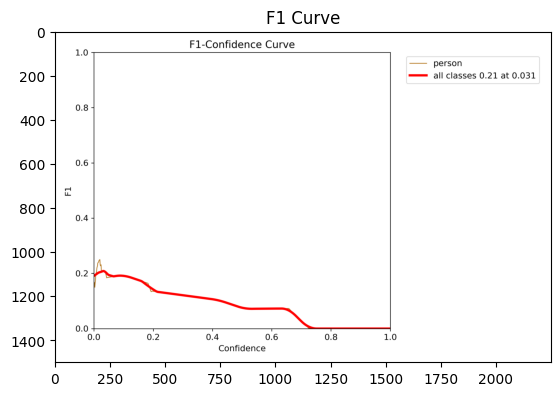

In [43]:
f1_curve = cv2.imread("/content/runs/detect/val/F1_curve.png")

plt.imshow(f1_curve)
plt.title("F1 Curve")

Text(0.5, 1.0, 'Confusion Matrix')

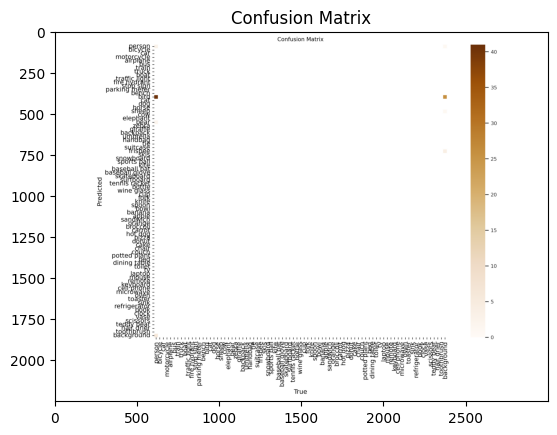

In [46]:
confusion_matrix = cv2.imread("/content/runs/detect/val/confusion_matrix.png")
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")

Text(0.5, 1.0, 'Val Batch1 Prediction')

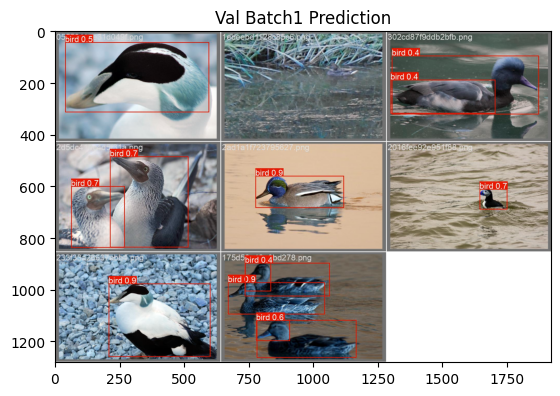

In [47]:
val_batch1_pred = cv2.imread("/content/runs/detect/val/val_batch1_pred.jpg")

plt.imshow(val_batch1_pred)
plt.title("Val Batch1 Prediction")

##### (iv)
 Visualize the results of one of the above model variants on 4 images from the validation set. Pick your own
diverse samples to qualitatively analyze how well the model performs.


In [38]:
model = YOLO('yolov8n.pt')

In [39]:
dataset_path = "/content/archive/config.yaml"

In [40]:
# Validate the model
metrics = model.val(data=dataset_path, imgsz=640, batch=8, iou=0.6, plots=True)  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category


Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 23.0MB/s]
val: Scanning /content/archive/labels/val... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 219.26it/s]

val: New cache created: /content/archive/labels/val.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]


                   all         50         52      0.489      0.115      0.157       0.12
                person         50         52      0.489      0.115      0.157       0.12
Speed: 4.7ms preprocess, 20.8ms inference, 0.0ms loss, 19.7ms postprocess per image
Results saved to runs/detect/val


array([    0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,
           0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,
           0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,     0.12025,
           0.12025,     0.12025,     0.1202

In [ ]:
map50 = metrics.box.map50
print("map50 =", map50)

map50 = 0.158812871398619


In [48]:
val_img1 = cv2.imread("/content/archive/images/val/0142d1fc46883a7b.png")
val_img2 = cv2.imread("/content/archive/images/val/033a2d3f9eac6188.png")
val_img3 = cv2.imread("/content/archive/images/val/05684a325a320136.png")
val_img4 = cv2.imread("/content/archive/images/val/14d3556c1249439d.png")

results = model([val_img1, val_img2, val_img3, val_img4])


0: 640x640 1 bird, 23.0ms
1: 640x640 1 bird, 23.0ms
2: 640x640 1 bird, 23.0ms
3: 640x640 3 birds, 23.0ms
Speed: 4.4ms preprocess, 23.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


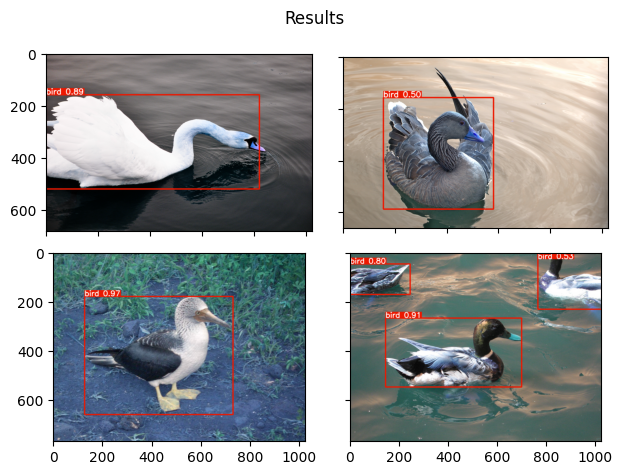

In [68]:
fig, axarr = plt.subplots(2, 2)
fig.suptitle('Results')
# ax1.plot(x, y)
# ax2.plot(x, y**2, 'tab:orange')
# ax3.plot(x, -y, 'tab:green')
# ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

for i, result in enumerate(results):
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    # result.show()  # display to screen

    filename = f'result_{i+1}.png'
    result.save(filename=filename) # save to disk
    # result.show()

result_img1 = cv2.imread("/content/result_1.png")
result_img2 = cv2.imread("/content/result_2.png")
result_img3 = cv2.imread("/content/result_3.png")
result_img4 = cv2.imread("/content/result_4.png")
axarr[0, 0].imshow(result_img1)
axarr[0, 1].imshow(result_img2)
axarr[1, 0].imshow(result_img3)
axarr[1, 1].imshow(result_img4)

plt.tight_layout()
plt.show()
# result_img = cv2.imread("/content/result.png")
# plt.imshow(result_img)

<b> Own Diverse Samples </b>

In [69]:
duck1 = cv2.imread("/content/duck1.png")
duck2 = cv2.imread("/content/duck2.jpeg")
duck3 = cv2.imread("/content/duck3.jpeg")


results = model([duck1, duck2, duck3])


0: 640x640 (no detections), 102.6ms
1: 640x640 1 bird, 102.6ms
2: 640x640 2 birds, 102.6ms
Speed: 9.5ms preprocess, 102.6ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)


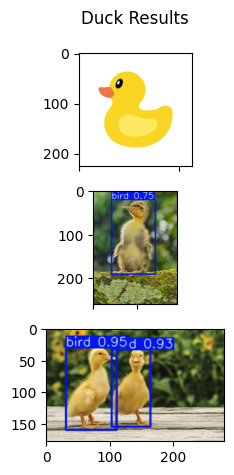

In [74]:
fig, axarr = plt.subplots(3, 1)
fig.suptitle('Duck Results')

for ax in fig.get_axes():
    ax.label_outer()

for i, result in enumerate(results):
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    # result.show()  # display to screen

    filename = f'duckresult_{i+1}.png'
    result.save(filename=filename) # save to disk
    # result.show()

duck_result_img1 = cv2.imread("/content/duckresult_1.png")
duck_result_img2 = cv2.imread("/content/duckresult_2.png")
duck_result_img3 = cv2.imread("/content/duckresult_3.png")

axarr[0].imshow(cv2.cvtColor(duck_result_img1, cv2.COLOR_BGR2RGB))
axarr[1].imshow(cv2.cvtColor(duck_result_img2, cv2.COLOR_BGR2RGB))
axarr[2].imshow(cv2.cvtColor(duck_result_img3, cv2.COLOR_BGR2RGB))
# axarr[1, 1].imshow(result_img4)

plt.tight_layout()
plt.show()

<b>Observations: </b>The pretrained Yolo-v8n model couldn't detect the duck which is animated.

#### part-5: Impact of Augmentation

##### (i)
<b>Does the default run use augmentations? Which one and what do they do? </b><br>

Yes, the default run uses augmentations.
For an example, for 100 images training dataset for yolo-v8n pretrained, following were the outputs for albumenations:- <br>
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8)) <br>

From the above example from the training logs, <b>Blur</b>, <b>MedianBlur</b>, <b>ToGray</b>, <b>CLAHE</b>, have been used as part of augmentation techniques. <br>
- Blur: Applies random Gaussian blur to the images. The blur_limit parameter specifies the range of blur strength to apply.

- MedianBlur: Applies random median blur to the images. The blur_limit parameter specifies the range of blur strength to apply.

- ToGray: Converts images to grayscale with a certain probability (p).

- CLAHE (Contrast Limited Adaptive Histogram Equalization): Applies contrast enhancement to the images using the CLAHE algorithm. The clip_limit parameter controls the amount of contrast enhancement, and the tile_grid_size parameter specifies the size of the grid for local histogram equalization.

##### (ii)
For the yolov8n model with pretrained weights (trained on 100 images), remove all augmentations and compare performance before and after. Is the change significant? If yes, why? If not, why?

<b> Before removing all augmentations: </b><br>
mAP50 = 0.391, <br>
P = 0.805

In [89]:
model = model_v8n
model.train(data=dataset_path_1, epochs=5, imgsz=640, batch=8)

Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/archive1/config.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

train: Scanning /content/archive1/labels/train.cache... 20 images, 80 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/archive1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      1.35G      1.408      15.08      1.373          2        640: 100%|██████████| 13/13 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all         50         52        0.7      0.269      0.386      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      1.42G      1.078      4.208      1.255          2        640: 100%|██████████| 13/13 [00:02<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]

                   all         50         52      0.706      0.231      0.412      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      1.42G      1.039      5.704      1.213          1        640: 100%|██████████| 13/13 [00:02<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all         50         52      0.802       0.25      0.391      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      1.43G      1.234      8.868      1.345          2        640: 100%|██████████| 13/13 [00:02<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.56it/s]


                   all         50         52      0.626      0.257      0.377       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      1.43G      1.608      9.715      1.447          1        640: 100%|██████████| 13/13 [00:02<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.12it/s]

                   all         50         52      0.664      0.192      0.321      0.205



5 epochs completed in 0.007 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]


                   all         50         52      0.805       0.25      0.392      0.264
Speed: 0.8ms preprocess, 10.2ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x792e55892c50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [90]:
# model = model_v8n
# Validate the model
metrics = model.val(data=dataset_path_1)  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/archive1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]


                   all         50         52      0.805       0.25      0.391      0.266
Speed: 0.3ms preprocess, 15.1ms inference, 0.0ms loss, 7.5ms postprocess per image
Results saved to runs/detect/train


array([    0.26585])

<b> After removing all augmentations: </b><br>
mAP50 = 0.381, <br>
P = 0.487

In [87]:
model = model_v8n
model.train(data=dataset_path_1, epochs=5, imgsz=640, batch=8)

Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/archive1/config.yaml, epochs=5, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

train: Scanning /content/archive1/labels/train.cache... 20 images, 80 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/archive1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5       1.3G      1.493      15.17      1.483          2        640: 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all         50         52       0.74      0.165      0.306      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      1.42G      1.393      4.871       1.48          2        640: 100%|██████████| 13/13 [00:02<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]

                   all         50         52      0.523      0.288      0.382      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      1.42G      1.159       5.88      1.271          1        640: 100%|██████████| 13/13 [00:02<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all         50         52      0.479       0.25      0.319      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      1.43G      1.406      9.356      1.452          2        640: 100%|██████████| 13/13 [00:02<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all         50         52      0.514      0.231      0.336      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      1.43G       1.72      11.35       1.51          1        640: 100%|██████████| 13/13 [00:02<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.10it/s]

                   all         50         52      0.685      0.212      0.334      0.195



5 epochs completed in 0.008 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]


                   all         50         52      0.522      0.288      0.381      0.234
Speed: 0.2ms preprocess, 8.2ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x792df680b340>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [88]:
# Validate the model
# flipud= 0, fliplr= 0, bgr= 0.0, mosaic=0
metrics = model.val(data=dataset_path_1, augment=False)
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/archive1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.38it/s]


                   all         50         52      0.487      0.269      0.381      0.228
Speed: 0.2ms preprocess, 14.5ms inference, 0.0ms loss, 5.6ms postprocess per image
Results saved to runs/detect/train


array([    0.22825])

<b>Observations: </b> On removing all the augmentations, there's a drastic drop in precision value (~60%). <br>
- This could be due to overfitting since augmentations help in preventing overfitting by introducing diversity in the training data. <br>
- Augmentations help in balancing the dataset by generating additional samples for underrepresented classes.


##### (iii)
<b> Which augmentation is the most important? How did you determine this? </b> <br>
There are four hyperparameters for augmentation, and those are flipud, fliplr, bgr and mosaic. <br><br>
Determining the "most important" augmentation depends on various factors, including the specific characteristics of your dataset, the task you are performing, and the performance metrics you are optimizing for. There isn't a one-size-fits-all answer to this question, as the importance of augmentations can vary greatly depending on the context.

The augmentation techniques that are being considered important are: -

- Random Horizontal and Vertical Flips: Flipping images horizontally or vertically can increase the diversity of the training data and help the model learn invariant features, especially for tasks like object detection and image classification.

- Random Rotations: Rotating images randomly helps the model learn to recognize objects from different orientations, improving its robustness to rotation variations in the input data.

- Random Crop and Resize: Randomly cropping and resizing images helps the model learn to focus on relevant parts of the image and handle variations in object sizes and positions.

- Random Brightness and Contrast Adjustments: Adjusting the brightness and contrast of images randomly can help the model learn to handle variations in lighting conditions.

- Random Gaussian Blur: Adding random Gaussian blur to images can help the model learn to generalize better to noisy or blurry images.